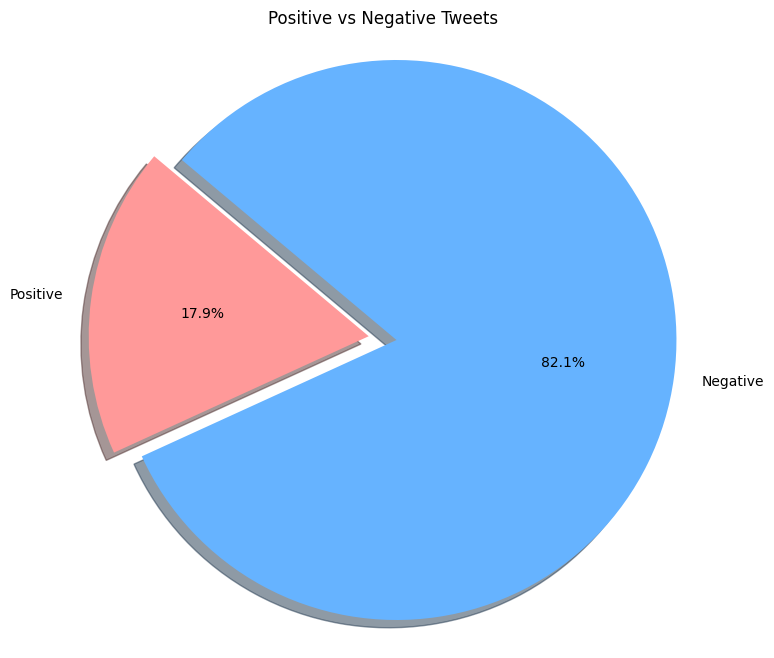

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results folder where the processed CSVs are stored
results_folder = "results"

# Initialize counters for positive and negative tweets
positive_count = 0
negative_count = 0

# Loop through each CSV file in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(results_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Count the occurrences of positive and negative labels
        positive_count += (df['label'] == 'POSITIVE').sum()
        negative_count += (df['label'] == 'NEGATIVE').sum()

# Data for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice for better visualization

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Positive vs Negative Tweets (first Wave of COVID-19)')
plt.show()


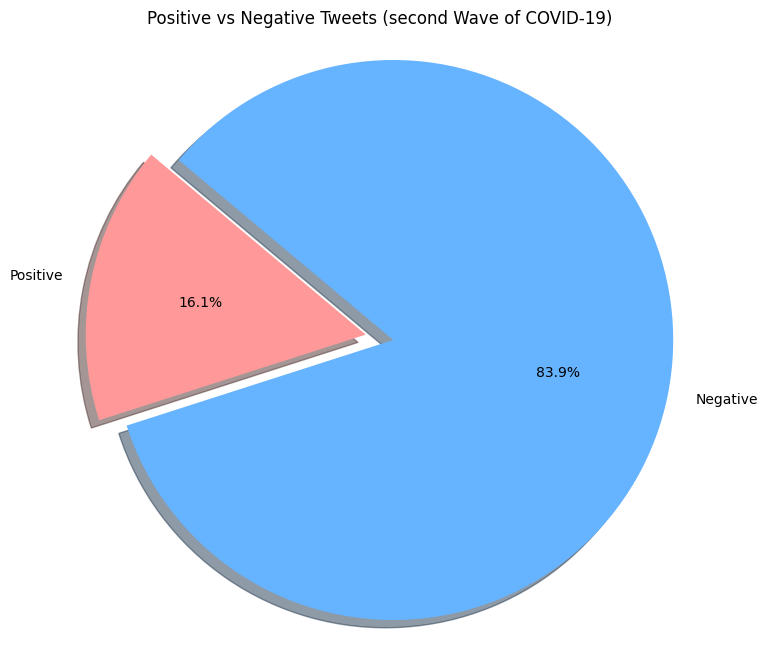

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results folder where the processed CSVs are stored
results_folder = "results/second_wave"

# Initialize counters for positive and negative tweets
positive_count = 0
negative_count = 0

# Loop through each CSV file in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(results_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Count the occurrences of positive and negative labels
        positive_count += (df['label'] == 'POSITIVE').sum()
        negative_count += (df['label'] == 'NEGATIVE').sum()

# Data for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice for better visualization

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Positive vs Negative Tweets (second Wave of COVID-19)')
plt.show()


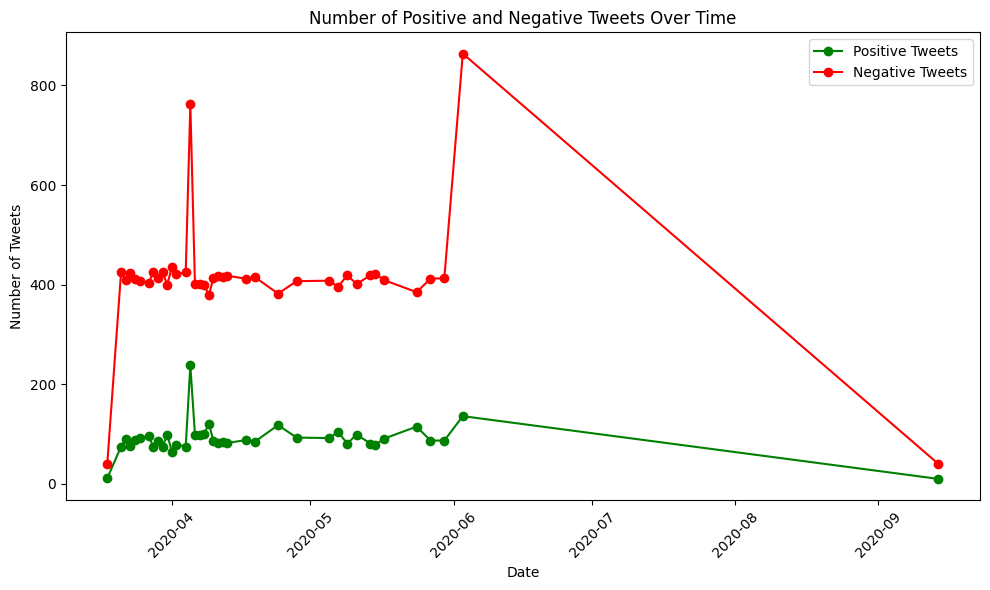

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results folder
results_folder = "results"

# Initialize an empty dataframe to store dates and sentiments
all_data = pd.DataFrame(columns=['created_at', 'label'])

# Loop through each CSV file in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(results_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Check if the 'created_at' and 'label' columns exist
        if 'created_at' in df.columns and 'label' in df.columns:
            # Convert 'created_at' to datetime, invalid parsing will be set to NaT
            df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
            
            # Extract the date part and drop rows with NaT values in 'created_at'
            df['date'] = df['created_at'].dt.date
            df = df.dropna(subset=['date'])
            
            # Append the relevant columns ('date' and 'label') to the all_data dataframe
            all_data = pd.concat([all_data, df[['date', 'label']]], ignore_index=True)

# Group by 'date' and 'label', and count the occurrences
tweet_counts = all_data.groupby(['date', 'label']).size().unstack(fill_value=0)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts.index, tweet_counts['POSITIVE'], label='Positive Tweets', color='green', marker='o')
plt.plot(tweet_counts.index, tweet_counts['NEGATIVE'], label='Negative Tweets', color='red', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Positive and Negative Tweets Over Time')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



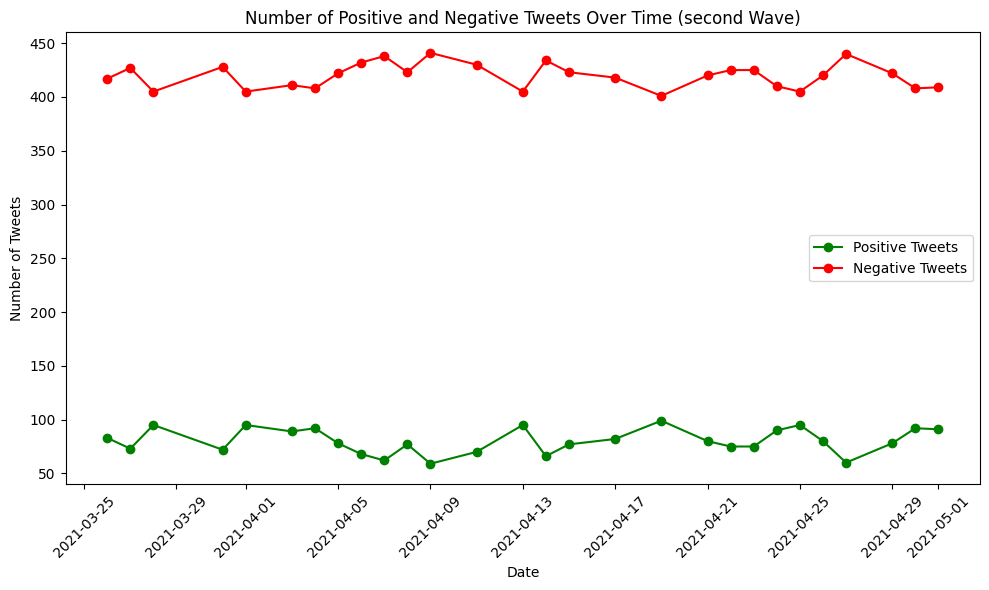

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results folder
results_folder = "results/second_wave"

# Initialize an empty dataframe to store dates and sentiments
all_data = pd.DataFrame(columns=['created_at', 'label'])

# Loop through each CSV file in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(results_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Check if the 'created_at' and 'label' columns exist
        if 'created_at' in df.columns and 'label' in df.columns:
            # Convert 'created_at' to datetime, invalid parsing will be set to NaT
            df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
            
            # Extract the date part and drop rows with NaT values in 'created_at'
            df['date'] = df['created_at'].dt.date
            df = df.dropna(subset=['date'])
            
            # Append the relevant columns ('date' and 'label') to the all_data dataframe
            all_data = pd.concat([all_data, df[['date', 'label']]], ignore_index=True)

# Group by 'date' and 'label', and count the occurrences
tweet_counts = all_data.groupby(['date', 'label']).size().unstack(fill_value=0)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts.index, tweet_counts['POSITIVE'], label='Positive Tweets', color='green', marker='o')
plt.plot(tweet_counts.index, tweet_counts['NEGATIVE'], label='Negative Tweets', color='red', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Positive and Negative Tweets Over Time (second Wave)')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


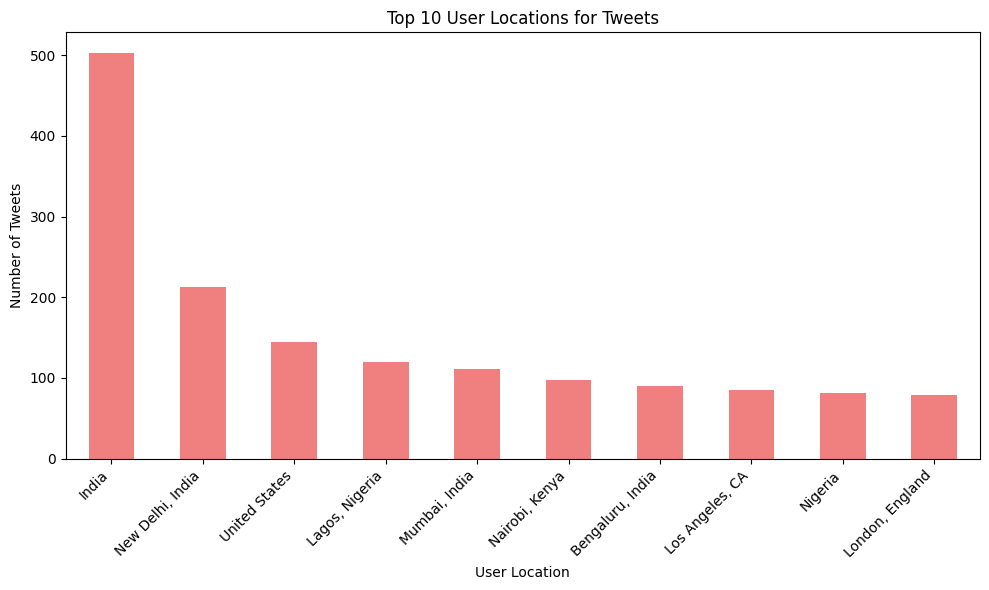

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results folder
results_folder = "results"

# Initialize a list to store valid user locations
valid_locations = []

# Loop through each CSV file in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith(".csv"):
        file_path = os.path.join(results_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Check if 'user_location' column exists
        if 'user_location' in df.columns:
            # Filter out rows where 'user_location' is '0'
            valid_locations.extend(df[df['user_location'] != '0']['user_location'].dropna().tolist())

# Convert to DataFrame and count occurrences of each location
location_df = pd.DataFrame(valid_locations, columns=['user_location'])
location_counts = location_df['user_location'].value_counts().head(10)  # Top 10 locations

# Plot the top locations
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('User Location')
plt.ylabel('Number of Tweets')
plt.title('Top 10 User Locations for Tweets')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


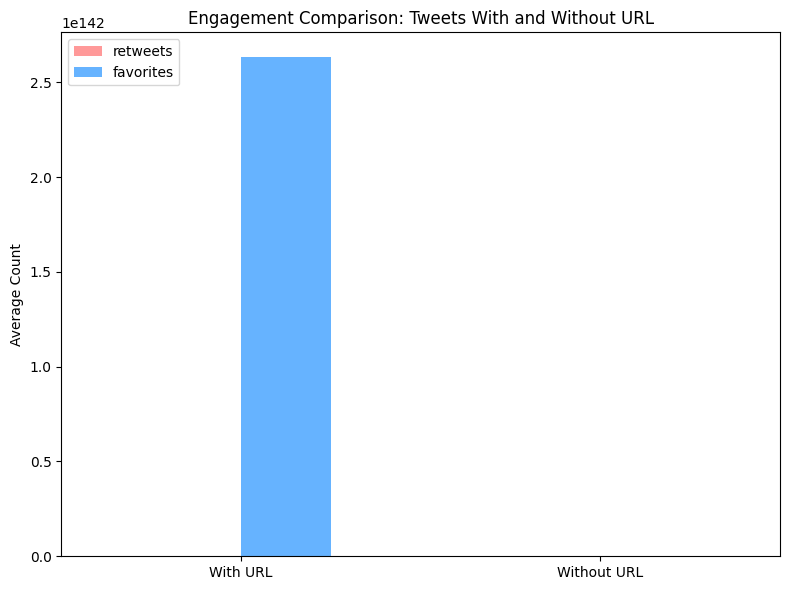

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results folder
results_folder = "results"

# Initialize lists for analysis
tweets_with_url = []
tweets_without_url = []

# Loop through each CSV file in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith(".csv"):
        file_path = os.path.join(results_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Check if the 'user_has_url?' and other columns exist
        if 'user_has_url?' in df.columns and 'retweet_count' in df.columns and 'favorite_count' in df.columns:
            # Filter based on 'user_has_url?' being 'Yes' or 'No'
            df_with_url = df[df['user_has_url?'] == 'Yes']
            df_without_url = df[df['user_has_url?'] == 'No']
            
            # Append average retweet and favorite counts
            if not df_with_url.empty:
                tweets_with_url.append([df_with_url['retweet_count'].mean(), df_with_url['favorite_count'].mean()])
            if not df_without_url.empty:
                tweets_without_url.append([df_without_url['retweet_count'].mean(), df_without_url['favorite_count'].mean()])

# Create a DataFrame for both 'With URL' and 'Without URL' comparisons
url_engagement_df = pd.DataFrame({
    'With URL': pd.DataFrame(tweets_with_url, columns=['retweets', 'favorites']).mean(),
    'Without URL': pd.DataFrame(tweets_without_url, columns=['retweets', 'favorites']).mean()
})

# Transpose the DataFrame for better visualization
url_engagement_df = url_engagement_df.T

# Plot the comparison
url_engagement_df.plot(kind='bar', figsize=(8, 6), color=['#FF9999', '#66B3FF'])
plt.title('Engagement Comparison: Tweets With and Without URL')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


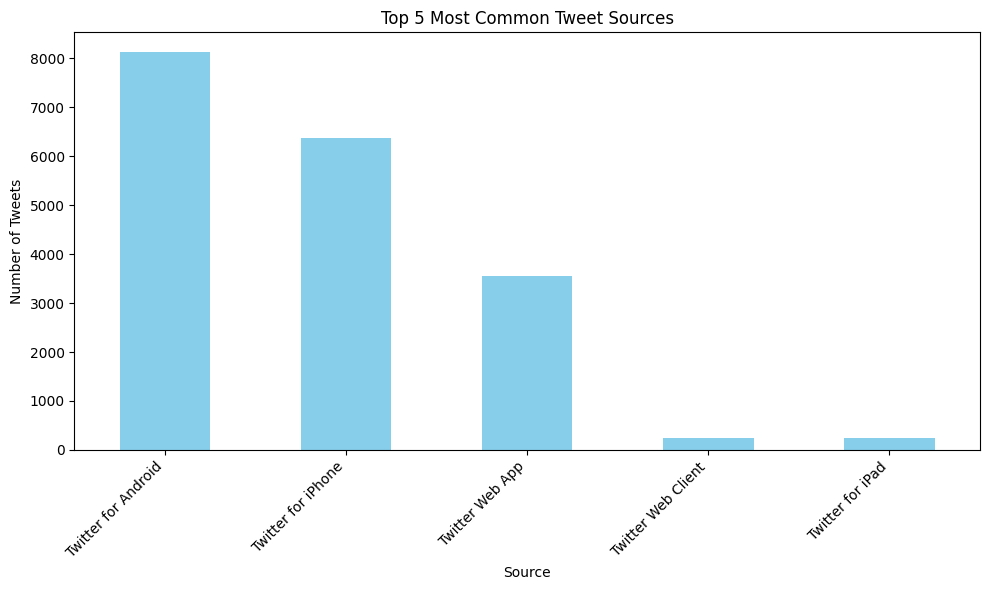

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results folder
results_folder = "results"

# Initialize a list to store sources
sources = []

# Loop through each CSV file in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith(".csv"):
        # Read the CSV file
        file_path = os.path.join(results_folder, file_name)
        df = pd.read_csv(file_path)
        
        # Check if the 'source' column exists
        if 'source' in df.columns:
            sources.extend(df['source'].dropna().tolist())

# Convert to a DataFrame and count occurrences of each source
source_df = pd.DataFrame(sources, columns=['source'])
source_counts = source_df['source'].value_counts()

# Limit to the top 5 sources
top_5_sources = source_counts.head(5)

# Create a bar chart for the top 5 sources
plt.figure(figsize=(10, 6))
top_5_sources.plot(kind='bar', color='skyblue')
plt.xlabel('Source')
plt.ylabel('Number of Tweets')
plt.title('Top 5 Most Common Tweet Sources')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

